## SVM Exercise

In [127]:
# import pandas
import pandas as pd

In [128]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
irisdata = pd.read_csv(url, names=colnames)
irisdata['label'] = irisdata['Class'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class,label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


* create X, y

In [129]:
X = irisdata.drop(['Class'], axis=1)

y = irisdata['label']

* import train_test_split and split data

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# what if I scale X_train and X_test?

from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

* import SVC from sklearn and use Polynomial kernel

In [132]:
from sklearn.svm import SVC

svc = SVC(kernel='poly')

* fit training data

In [133]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

* predict X_test

In [134]:
y_pred = svc.predict(X_test)
y_pred
print(f'Testing score: {svc.score(X_test, y_test)}')

Testing score: 1.0


* import confusion matrix from sklearn and print values

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


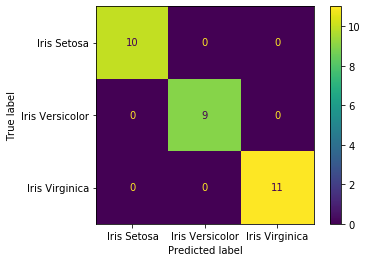

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(cm, display_labels=['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
disp.plot()

Testing score: 0.9666666666666667
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


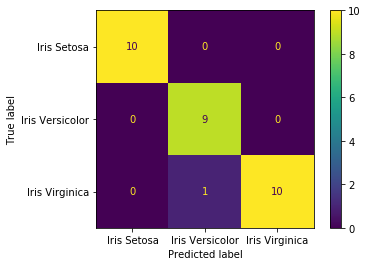

In [136]:
# fit and predict with scaled X

svc.fit(X_train_scaled, y_train)
y_pred_scaled = svc.predict(X_test_scaled)
print(f'Testing score: {svc.score(X_test_scaled, y_test)}')
cm_scaled = confusion_matrix(y_test, y_pred_scaled)
print(cm_scaled)
disp = ConfusionMatrixDisplay(cm_scaled, display_labels=['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
disp.plot()

* create SVC with rbf kernel

In [137]:
svc_rbf = SVC(kernel='rbf') # should I specify this? It seems to be the default kernel

* fit training data

In [138]:
svc_rbf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

* predict X_test

In [139]:
rbf_y_pred = svc_rbf.predict(X_test)
print(f'Testing score: {svc_rbf.score(X_test, y_test)}')

Testing score: 1.0


* print confusion matrix

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


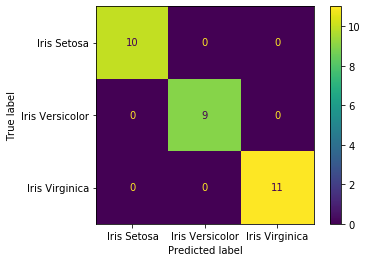

In [140]:
cm_rbf = confusion_matrix(y_test, y_pred)
print(cm_rbf)
disp = ConfusionMatrixDisplay(cm_rbf, display_labels=['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
disp.plot()

Testing score: 1.0
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


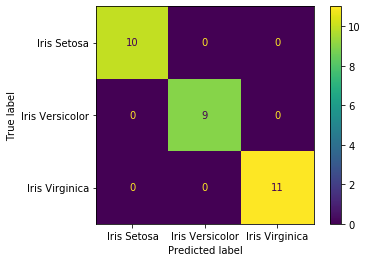

In [141]:
# fit and predict with scaled X

svc_rbf.fit(X_train_scaled, y_train)
rbf_y_pred_scaled = svc_rbf.predict(X_test_scaled)
print(f'Testing score: {svc_rbf.score(X_test_scaled, y_test)}')
rbf_cm_scaled = confusion_matrix(y_test, rbf_y_pred_scaled)
print(rbf_cm_scaled)
disp = ConfusionMatrixDisplay(rbf_cm_scaled, display_labels=['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
disp.plot()

* create SVC with sigmoid kernel

In [142]:
svc_sigmoid = SVC(kernel='sigmoid')

* fit training data

In [143]:
svc_sigmoid.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

* predict X_test

In [144]:
sigmoid_y_pred = svc_sigmoid.predict(X_test)
print(f'Testing score: {svc_sigmoid.score(X_test, y_test)}')

Testing score: 0.26666666666666666


[[ 1  9  0]
 [ 2  7  0]
 [10  1  0]]


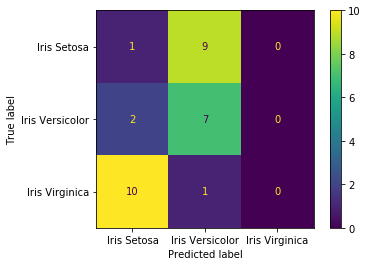

In [145]:
# confusion matrix of sigmoid kernel
cm_sigmoid = confusion_matrix(y_test, sigmoid_y_pred)
print(cm_sigmoid)
disp = ConfusionMatrixDisplay(cm_sigmoid, display_labels=['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
disp.plot()

Testing score: 0.9666666666666667
[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


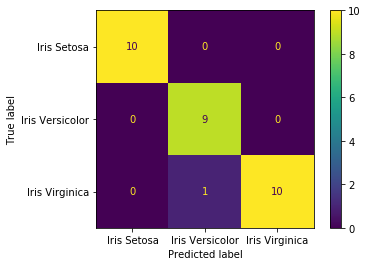

In [146]:
# fit and predict with scaled X

svc_sigmoid.fit(X_train_scaled, y_train)
sigmoid_y_pred_scaled = svc_sigmoid.predict(X_test_scaled)
print(f'Testing score: {svc_sigmoid.score(X_test_scaled, y_test)}')
sigmoid_cm_scaled = confusion_matrix(y_test, sigmoid_y_pred_scaled)
print(sigmoid_cm_scaled)
disp = ConfusionMatrixDisplay(sigmoid_cm_scaled, display_labels=['Iris Setosa', 'Iris Versicolor', 'Iris Virginica'])
disp.plot()

#### Q: Which kernel was the most accurate on the testing set?

Without scaling both RBF and Polynomial got a 100% score, the sigmoid one got 26%.
With scaling, the results are better splitted, RBF is the best but also sigmoid performs really well.